# Basic Queries in SciDB-Py

```
Copyright (C) 2008-2017 SciDB, Inc.
All Rights Reserved.

SciDB is free software: you can redistribute it and/or modify
it under the terms of the AFFERO GNU General Public License as published by
the Free Software Foundation.

SciDB is distributed "AS-IS" AND WITHOUT ANY WARRANTY OF ANY KIND,
INCLUDING ANY IMPLIED WARRANTY OF MERCHANTABILITY,
NON-INFRINGEMENT, OR FITNESS FOR A PARTICULAR PURPOSE. See
the AFFERO GNU General Public License for the complete license terms.

You should have received a copy of the AFFERO GNU General Public License
along with SciDB.  If not, see <http://www.gnu.org/licenses/agpl-3.0.html>
```

## Overview of SciDB and SciDB-Py

A SciDB database installation consists of multiple instances (or processes), distributing data and processing across multiple processors within the same node, or across multiple nodes. Data in a SciDB database can be accessed directly using queries composed in the Array Functional Language (**`AFL`**), which can be run through SciDB's command line **`iquery`** client.

However, SciDB can be interacted with directly from Python using the **`SciDB-Py`** API package. 

If you have issues or questions, note that you can also look up SciDB documentation in the [SciDB reference guide](https://paradigm4.atlassian.net/wiki/spaces/ESD169/pages/50856157/SciDB+Reference+Guide).  And you can jump straight to the documentation for individual operators [here](https://paradigm4.atlassian.net/wiki/spaces/ESD169/pages/50856265/SciDB+Operators).  You can also look at `SciDB-Py` documentation [here](http://paradigm4.github.io/SciDB-Py/).

## Objectives

This notebook is intended for users new to SciDB and covers quick queries on small examples. We cover the following topics:

- Connect to SciDB
- List instances
- Create a test array with build
- Limit
- Summarize
- Apply
- Filter
- Between
- Project
- Aggregates
- Sort
- Basic Joins


### Warning:

This notebook was generated using new pre-release SciDB 17.x Enterprise Edition. Some syntax in Community Edition / versions 16.9 and earlier may be different.

## 1. Connect to SciDB

First off, connect to the SciDB database.

The Enterprise Edition uses password logins. The Usual AMI password is 'Paradigm4' - enter it when prompted. If you are using the Community Edition, you can connect without the `scidb_auth` parameter:

In [1]:
from scidbpy import connect
import getpass
import requests
import warnings
warnings.filterwarnings("ignore")
requests.packages.urllib3.disable_warnings(requests.packages.urllib3.exceptions.InsecureRequestWarning)
db = connect(scidb_url="https://localhost:8083", 
             scidb_auth=('root', getpass.getpass('Please enter your password: ')),
             verify=False)

Please enter your password: ········


## 2. List instances

List the SciDB instances (processes) running under this SciDB installation.  Here we use the **`iquery`** client in SciDB-Py to directly issue an **`AFL`** query.

In [2]:
db.list('instances')[:]

,No,name,port,instance_id,online_since,instance_path
0,0,127.0.0.1,1239,0,2017-09-27 17:21:03,/home/scidb/data/0/0
1,1,127.0.0.1,1240,1,2017-09-27 17:21:03,/home/scidb/data/0/1
2,2,127.0.0.1,1241,2,2017-09-27 17:21:03,/home/scidb/data/0/2
3,3,127.0.0.1,1242,3,2017-09-27 17:21:03,/home/scidb/data/0/3
4,4,127.0.0.1,1243,4,2017-09-27 17:21:03,/home/scidb/data/0/4
5,5,127.0.0.1,1244,5,2017-09-27 17:21:03,/home/scidb/data/0/5
6,6,127.0.0.1,1245,6,2017-09-27 17:21:03,/home/scidb/data/0/6
7,7,127.0.0.1,1246,7,2017-09-27 17:21:03,/home/scidb/data/0/7
8,8,127.0.0.1,1247,8,2017-09-27 17:21:03,/home/scidb/data/0/8
9,9,127.0.0.1,1248,9,2017-09-27 17:21:03,/home/scidb/data/0/9


This particular installation has 16 instances running.

## 2. Create a test array with build


Create a new array named `'foo'` in our database.  It will have two dimensions (x and y), with values 1-5 along the x dimension, and values of 1-10 along the y dimension.

In [3]:
db.store(db.build( "<val:double>[x=1:5:0:1; y=1:10:0:10]", "(x-1)*10 + (y-1)"), 'foo', gc=0)

Array(DB('https://localhost:8083', ('root', PASSWORD_PROVIDED), None, None, False), 'foo')

The **`build`** operator generates the array, and the **`store`** operator saves the result as an array in our database.

## 3. Limit

The **`limit`** operator returns a subset of the data in the array, in arbitrary order.  This is useful for looking at small parts of a large array.

Let's look at 10 elements from `foo`:

In [4]:
db.limit('foo', 10)[:]

,x,y,val
0,4,1,30.0
1,4,2,31.0
2,4,3,32.0
3,4,4,33.0
4,4,5,34.0
5,4,6,35.0
6,4,7,36.0
7,4,8,37.0
8,4,9,38.0
9,4,10,39.0


This array is organized into 5 "skinny" chunks with 10 elements each. Here's a diagram that represents the array visually:

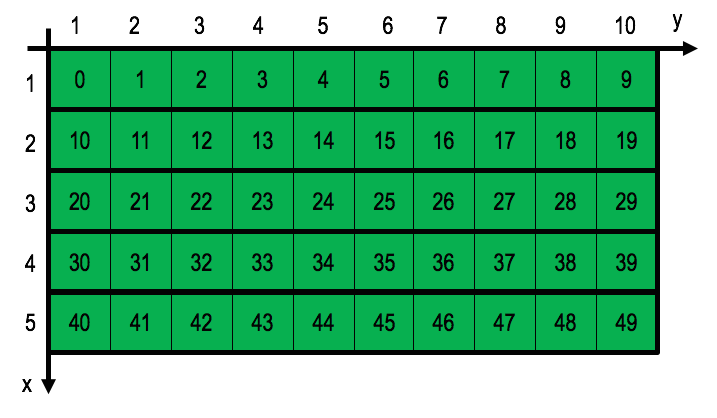

## 4. Summarize

The **`summarize`** operator can be used to give information about the overall size and distribution of the contents of a SciDB array.

In [5]:
db.summarize('foo')[:]

,inst,attid,att,count,bytes,chunks,min_count,avg_count,max_count,min_bytes,avg_bytes,max_bytes
0,0,0,all,50.0,1000.0,10.0,10.0,10.0,10.0,48.0,100.0,152.0


But `summarize` can also be evaluated on each instance.  Using `sumarize` in this way, we can see that the `foo` array's contents are actually stored split across multiple instances within our SciDB installation. 

In [6]:
db.summarize('foo', "by_instance:1")[:]

,inst,attid,att,count,bytes,chunks,min_count,avg_count,max_count,min_bytes,avg_bytes,max_bytes
0,0,0,all,10.0,200.0,2.0,10.0,10.0,10.0,48.0,100.0,152.0
1,1,0,all,10.0,200.0,2.0,10.0,10.0,10.0,48.0,100.0,152.0
2,2,0,all,10.0,200.0,2.0,10.0,10.0,10.0,48.0,100.0,152.0
3,3,0,all,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0,all,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,5,0,all,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6,6,0,all,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7,7,0,all,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
8,8,0,all,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
9,9,0,all,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
db.summarize('foo', "by_instance:1", "by_attribute:1")[:]

,inst,attid,att,count,bytes,chunks,min_count,avg_count,max_count,min_bytes,avg_bytes,max_bytes
0,0,0,val,10.0,152.0,1.0,10.0,10.0,10.0,152.0,152.0,152.0
1,0,1,EmptyTag,10.0,48.0,1.0,10.0,10.0,10.0,48.0,48.0,48.0
2,1,0,val,10.0,152.0,1.0,10.0,10.0,10.0,152.0,152.0,152.0
3,1,1,EmptyTag,10.0,48.0,1.0,10.0,10.0,10.0,48.0,48.0,48.0
4,2,0,val,10.0,152.0,1.0,10.0,10.0,10.0,152.0,152.0,152.0
5,2,1,EmptyTag,10.0,48.0,1.0,10.0,10.0,10.0,48.0,48.0,48.0
6,3,0,val,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7,3,1,EmptyTag,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
8,4,0,val,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
9,4,1,EmptyTag,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


## 5. scan and op_count

The **`scan`** operator simply downloads the entire array into Python. Be careful when running this on large arrays and check using **`summarize`** first. 

In [8]:
x = db.scan('foo')[:]
x.head()

,x,y,val
0,4,1,30.0
1,4,2,31.0
2,4,3,32.0
3,4,4,33.0
4,4,5,34.0


With iPython we can use `db.arrays.[TAB]` to auto-complete array names. For example:

In [9]:
x = db.scan(db.arrays.foo)[:]
x.head()

,x,y,val
0,4,1,30.0
1,4,2,31.0
2,4,3,32.0
3,4,4,33.0
4,4,5,34.0


The macro **`op_count`** will return the total number of cells. But **`summarize`** is usually quicker:

In [10]:
db.op_count(db.arrays.foo)[:]

,i,count
0,0,50.0


# Exercise I

Let's consider an array of average temperature values at adjacent latitude regions over a period of ten weeks.  The toy temperature matrix is generated below.

In [11]:
db.iquery("store(build(<temp_celsius:double>[latitude=1:5:0:2; week=1:10:0:5], (latitude-1)*2 + week), temperatures)")

**(A)**. Display 8 elements from the `temperatures` array. 

In [12]:
# Answer to Exercise I.A:


**(B)**. Count the number of values in the array. How many chunks are there?

In [13]:
# Answer to Exercise I.B:


## 6. Apply

The **`apply`** operator allows us to evaluate an expression on each element in a source array.  **`apply`** returns an array with the same dimensions as the original array, but with an additional named attribute for the expression that was evaluated.

For example if the `foo` array contained values expressed in US Dollars, we might want to convert them to their equivalent values in Euros, or in Canadian Dollars.  (As of December 1, 2017, the exchange rate was approximately: (US \$1) == (0.84 Euro) == (\$1.27 Canadian)


In [14]:
db.apply(db.arrays.foo, "val_Euro", "(0.84 * val )")[:]

,x,y,val,val_Euro
0,4,1,30.0,25.20
1,4,2,31.0,26.04
2,4,3,32.0,26.88
3,4,4,33.0,27.72
4,4,5,34.0,28.56
5,4,6,35.0,29.40
6,4,7,36.0,30.24
7,4,8,37.0,31.08
8,4,9,38.0,31.92
9,4,10,39.0,32.76


You can create multiple new attributes at once using apply, by generating multiple pairs of new attribute names, followed by their associated expression.  So if we wanted to create two new attributes for values in Euros and in Canadian dollars, you could do both at once with the following expression.

In [15]:
db.apply(db.arrays.foo, "val_Euro", "(0.84 * val)", 
                       "val_Canadian", "(1.27 * val)")[:]

,x,y,val,val_Euro,val_Canadian
0,4,1,30.0,25.20,38.10
1,4,2,31.0,26.04,39.37
2,4,3,32.0,26.88,40.64
3,4,4,33.0,27.72,41.91
4,4,5,34.0,28.56,43.18
5,4,6,35.0,29.40,44.45
6,4,7,36.0,30.24,45.72
7,4,8,37.0,31.08,46.99
8,4,9,38.0,31.92,48.26
9,4,10,39.0,32.76,49.53


Notice that since these arrays are still relatively long, we can again use `limit` to only show a more manageable subset of the entries.  We can also build up these operations by nesting them.

In [16]:
db.limit(db.apply(db.arrays.foo, "val_Euro", "(0.84 * val)", 
                  "val_Canadian", "(1.27 * val)"), 5)[:]

,x,y,val,val_Euro,val_Canadian
0,4,1,30.0,25.20,38.10
1,4,2,31.0,26.04,39.37
2,4,3,32.0,26.88,40.64
3,4,4,33.0,27.72,41.91
4,4,5,34.0,28.56,43.18


To make it easier to build up statements with nested operators, we can save intermediary statements in Python objects.  Just assign a statement to a Python variable before using the "[:]" to execute it.

In [17]:
query_statement = db.apply(db.arrays.foo, "val_Euro", "(0.84 * val)", "val_Canadian", "(1.27 * val)")
print(query_statement)

apply(foo, val_Euro, (0.84 * val), val_Canadian, (1.27 * val))


In [18]:
query_statement_2 = db.limit(query_statement, 5)
print(query_statement_2)

limit(apply(foo, val_Euro, (0.84 * val), val_Canadian, (1.27 * val)), 5)


In [19]:
query_statement_2[:]

,x,y,val,val_Euro,val_Canadian
0,4,1,30.0,25.20,38.10
1,4,2,31.0,26.04,39.37
2,4,3,32.0,26.88,40.64
3,4,4,33.0,27.72,41.91
4,4,5,34.0,28.56,43.18


## 7. Filter

The **`filter`** operator allows you to select a subset of the observations that satisfy a logical expression.  For example selecting all the values in an array that are less than 15:

In [20]:
db.filter(db.arrays.foo, "val < 15")[:]

,x,y,val
0,2,1,10.0
1,2,2,11.0
2,2,3,12.0
3,2,4,13.0
4,2,5,14.0
5,1,1,0.0
6,1,2,1.0
7,1,3,2.0
8,1,4,3.0
9,1,5,4.0


And if you wanted to select only the data that have values between 5 and 15, you could supply the following command:

In [21]:
db.filter(db.arrays.foo, "(val > 5) and (val < 15)")[:]

,x,y,val
0,2,1,10.0
1,2,2,11.0
2,2,3,12.0
3,2,4,13.0
4,2,5,14.0
5,1,7,6.0
6,1,8,7.0
7,1,9,8.0
8,1,10,9.0


## 8. Expressions and Functions

Note that both **`apply`** and **`filter`** use _expressions_ which are ultimately made up of functions. In SciDB, `*`, `+` and `>` are considered to be _functions_. There are many other functions and functions can be user-defined in a C++ plugin.

In [22]:
db.apply(db.arrays.foo, 'x', 'abs(sqrt(val) - 10)')[:].head()

,x_1,y,val,x
0,4,1,30.0,4.522774
1,4,2,31.0,4.432236
2,4,3,32.0,4.343146
3,4,4,33.0,4.255437
4,4,5,34.0,4.169048


In [23]:
db.list("functions")[:]

,No,name,profile,deterministic,library
0,0,%,"double %(double,double)",True,scidb
1,1,%,"int16 %(int16,int16)",True,scidb
2,2,%,"int32 %(int32,int32)",True,scidb
3,3,%,"int64 %(int64,int64)",True,scidb
4,4,%,"int8 %(int8,int8)",True,scidb
5,5,%,"uint16 %(uint16,uint16)",True,scidb
6,6,%,"uint32 %(uint32,uint32)",True,scidb
7,7,%,"uint64 %(uint64,uint64)",True,scidb
8,8,%,"uint8 %(uint8,uint8)",True,scidb
9,9,*,"double *(double,double)",True,scidb


The function **`iif`** is handy. The signature is `iif( [BOOLEAN_EXPRESSION], [VALUE_IF_TRUE], [VALUE_IF_FALSE])`. The second and third operand must have the same type:

In [24]:
db.apply(db.arrays.foo, 'is_even', 'iif(val % 2 = 0, 1, 0)')[:]

,x,y,val,is_even
0,4,1,30.0,1.0
1,4,2,31.0,0.0
2,4,3,32.0,1.0
3,4,4,33.0,0.0
4,4,5,34.0,1.0
5,4,6,35.0,0.0
6,4,7,36.0,1.0
7,4,8,37.0,0.0
8,4,9,38.0,1.0
9,4,10,39.0,0.0


Compare to this:

In [25]:
db.op_count(db.filter(db.arrays.foo, 'val % 2 = 0'))[:]

,i,count
0,0,25.0


In [26]:
db.op_count(db.filter(db.arrays.foo, 'val % 2 <> 0'))[:]

,i,count
0,0,25.0


## 9. Between

With the **`between`** operator you can select a contiguous subsection of an array, as defined by regions along the array's dimensions.  Prior to 17.x, **`between`** used to be significantly faster than **`filter`** by dimensions. However, as of 17.x optimizations to filter use the same code path when dimensions are filtered. Thus, **`between`** mostly provides an alternate array-style syntax.

The operator takes the form:

`db.between(array_name, lower_bound_dim_1 [,lower_bound_dim_2,...], upper_bound_dim_1 [,upper_bound_dim_2,...] )`

So if we wanted to select the region of `foo` with x-dimension values of between 3 and 5, and y-dimension values of between 6 and 10, it could be done with the following statement:

In [27]:
db.between(db.arrays.foo, 3, 6, 5, 10)[:]

,x,y,val
0,4,6,35.0
1,4,7,36.0
2,4,8,37.0
3,4,9,38.0
4,4,10,39.0
5,5,6,45.0
6,5,7,46.0
7,5,8,47.0
8,5,9,48.0
9,5,10,49.0


Two things worth noting.  First, the lower and upper bounds for each dimension are inclusive -- in the above statement elements were returned that had x-dimension values of 3, 4, 5, or 6.  

Second, that all dimensions have to be specified, listing all of the lower dimension boundaries before listing ecah of the upper dimension boundaries.  If you want to select all of a given dimension, you can specify the upper and lower boundaries as NULL.  

In [28]:
db.between(db.arrays.foo, "NULL", 6, "NULL", 10)[:]
db.filter(db.arrays.foo, 'y>=6 and y<=10')[:]

,x,y,val
0,4,6,35.0
1,4,7,36.0
2,4,8,37.0
3,4,9,38.0
4,4,10,39.0
5,2,6,15.0
6,2,7,16.0
7,2,8,17.0
8,2,9,18.0
9,2,10,19.0


Or if you wish to select all values above the lower bound, leave the upper boundary for that dimension NULL.  And if you wish to select all values below the upper boundary, specify the lower boundary as NULL.

In [29]:
db.between(db.arrays.foo, "NULL", 6, 5, 10)[:]
db.filter(db.arrays.foo,' x<=6 and y>=5 and y<=10')[:]

,x,y,val
0,4,5,34.0
1,4,6,35.0
2,4,7,36.0
3,4,8,37.0
4,4,9,38.0
5,4,10,39.0
6,2,5,14.0
7,2,6,15.0
8,2,7,16.0
9,2,8,17.0


In [30]:
db.between(db.arrays.foo, 3, 6, "NULL", 10)[:]

,x,y,val
0,4,6,35.0
1,4,7,36.0
2,4,8,37.0
3,4,9,38.0
4,4,10,39.0
5,5,6,45.0
6,5,7,46.0
7,5,8,47.0
8,5,9,48.0
9,5,10,49.0


## 10. Knowing what will be returned

After a few `apply` statements and other nested operations, it may not be obvious what the query will return. Internally, SciDB has a `show` operator to do that, with a few options. In python we'll define a `show_schema` function for ease of use:

In [31]:
from scidbpy import Schema
def show_schema(db, array):
    if (type(array) != str):  
        array = str(array)
    else:
        array = array  
    if ('(' in array):    #AFL statement? escape quotes and run show('query', 'afl')
        array = """'{}','afl'""".format(array.replace("'", "\\'"))
    sch = Schema.fromstring(db.show(array)[:]['schema'][0].encode('ascii'))
    sch.name = '' #clear out the 'name' field for more clarity
    return(str(sch))

In [32]:
show_schema(db, 'foo')

'<val:double> [x=1:5:0:1; y=1:10:0:10]'

In [33]:
show_schema(db, db.apply(db.arrays.foo, "val_Euro", "(0.84 * val)"))

'<val:double,val_Euro:double> [x=1:5:0:1; y=1:10:0:10]'

Note the type system. Casting a double to an int64 rounds down to the nearest integer:

In [34]:
show_schema(db, db.apply(db.arrays.foo, 'val_Euro', 'double(0.84 * val)'))

'<val:double,val_Euro:double> [x=1:5:0:1; y=1:10:0:10]'

While we're on the subject of types, note they can be `list`-ed and can also be user-defined:

In [35]:
db.list('types')[:]

,No,name,library
0,0,binary,scidb
1,1,bool,scidb
2,2,char,scidb
3,3,datetime,scidb
4,4,datetimetz,scidb
5,5,double,scidb
6,6,float,scidb
7,7,indicator,scidb
8,8,int16,scidb
9,9,int32,scidb


Note: filter and between do not change the schema of the result. But the returned result may be smaller - cells can become "empty":

In [36]:
show_schema(db, db.filter(db.arrays.foo, 'val<10'))

'<val:double> [x=1:5:0:1; y=1:10:0:10]'

There is a distinction that SciDB makes between dimensions and attributes that plays a role in a few operations.

To start off, in certain cases, you don't need to fetch the dimensions of the data:

In [37]:
db.apply(db.arrays.foo, 'val_Euro', '0.84 * val').fetch().head()

,x,y,val,val_Euro
0,4,1,30.0,25.20
1,4,2,31.0,26.04
2,4,3,32.0,26.88
3,4,4,33.0,27.72
4,4,5,34.0,28.56


In [38]:
db.apply(db.arrays.foo, 'val_Euro', '0.84 * val').fetch(atts_only=True).head()

,val,val_Euro
0,30.0,25.20
1,31.0,26.04
2,32.0,26.88
3,33.0,27.72
4,34.0,28.56


## 11. Project

The operator **`project`** can be used to select only certain attributes, or re-order the attributes. Suppose we want only `val_Euro` to be returned:

In [39]:
dollars_and_euros = db.apply(db.arrays.foo, 'val_Euro', '0.84 * val')
db.project(dollars_and_euros, 'val_Euro', 'val').limit(5).fetch(atts_only=True)

,val_Euro,val
0,25.20,30.0
1,26.04,31.0
2,26.88,32.0
3,27.72,33.0
4,28.56,34.0


Or maybe we want `val_Euro` returned as the first column, followed by `val`:

In [40]:
db.project(dollars_and_euros, 'val_Euro', 'val').limit(5).fetch(atts_only=True)

,val_Euro,val
0,25.20,30.0
1,26.04,31.0
2,26.88,32.0
3,27.72,33.0
4,28.56,34.0


Note that dimensions cannot be projected. But we can apply a dimension to an attribute and then project. For example, suppose we want to fetch `y` and `val_Euro` only:

In [41]:
dollars_and_euros = db.apply(db.arrays.foo, 'val_Euro', '0.84 * val', 'y_value', 'y')
db.project(dollars_and_euros, 'y_value', 'val_Euro').limit(5).fetch(atts_only=True)

,y_value,val_Euro
0,1,25.20
1,2,26.04
2,3,26.88
3,4,27.72
4,5,28.56


## 12. Null values

SciDB attributes can be `null`, or _missing_. When downloading to Pandas, we convert `null` values to an approrpriate `missing` value for the datatype. It could be `NaN` for numerics or `none` for strings.

In [42]:
dollars_and_euros = db.apply(db.arrays.foo, 'val_Euro', '0.84 * val')
euros_over_40 = db.apply(dollars_and_euros, 'val_Euro_over_40', 'iif(val_Euro > 40, val_Euro, null)')
euros_over_40[:]

,x,y,val,val_Euro,val_Euro_over_40
0,4,1,30.0,25.20,NaN
1,4,2,31.0,26.04,NaN
2,4,3,32.0,26.88,NaN
3,4,4,33.0,27.72,NaN
4,4,5,34.0,28.56,NaN
5,4,6,35.0,29.40,NaN
6,4,7,36.0,30.24,NaN
7,4,8,37.0,31.08,NaN
8,4,9,38.0,31.92,NaN
9,4,10,39.0,32.76,NaN


When using `filter`, use `is null` and `is not null` to select null values. The expression `x = null` evaluates to `null` and `filter` will not include these in the result:

In [43]:
db.filter(euros_over_40, 'val_Euro_over_40 is not null')[:]

,x,y,val,val_Euro,val_Euro_over_40
0,5,9,48.0,40.32,40.32
1,5,10,49.0,41.16,41.16


# Exercise II

Back to our temperature matrix:

In [44]:
db.iquery("store(build(<temp_celsius:double>[latitude=1:5,2,0, week=1:10,10,0], (latitude-1)*2 + week), temperatures)")

In [45]:
show_schema(db, 'foo')

'<val:double> [x=1:5:0:1; y=1:10:0:10]'

**(A)**. Output the elements that have a temperature between 10 and 15 degrees Celcius. How many are there?

In [46]:
# Answer to Exercise II.A:


**(B)**. Display all of the elements in the 3rd latitude group. What's the largest temperature?

In [47]:
# Answer to Exercise II.B:


**(C)**. Display the elements from the latitudes 3, 4, and 5, and for weeks 8 and later. What's the smallest value?

In [48]:
# Answer to Exercise II.C:


**(D)**. Only return the elements from part (D) with temperatures less than 15 degrees Celcius. How many results?

In [49]:
# Answer to Exercise II.D:


**(E)**. Add an attribute with the equivalent temperatures in Kelvin.  Recall that the Kelvin scale uses the same scale as Celcius (that is, one degree difference Kelvin is the same as degree difference in Celcius).  However Kelvin measures temperatures from absolute zero, so Kelvin temperatures are 273.15 degrees higher than their equivalent Celcius temperature. Whats the max value in Kelvin?

In [50]:
# Answer to Exercise II.E:


**(F)**. Add another attribute with the temperatures converted into their Farenheit equivalents.  Recall that Farenheit temperatures can be calculated from Celcius by the formula 
> `temp_farenheit = (1.8 * temp_celcius) + 32`. 

What's the largest value in Fahrenheit?

In [51]:
# Answer to Exercise II.F:


## 13. Aggregates

Operator `aggregate` can be used to compute summary statistics over attributes:

In [52]:
db.aggregate(db.arrays.foo, "sum(val)")[:]

,i,val_sum
0,0,1225.0


Where did that `i` come from? In SciDB data model needs to have at least one dimension. The summation of the array necessarily creates a single-cell output and the dimension for that one cell is called `i`:

In [53]:
show_schema(db, db.aggregate(db.arrays.foo, "sum(val)"))

'<val_sum:double> [i=0:0:0:1]'

The name `sum` is a cal to a SciDB aggregate. Aggregates can also be list()-ed and user-defined:

In [54]:
db.list("'aggregates'")[:]

,No,name,typeid,library
0,0,approxdc,void,scidb
1,1,avg,double,scidb
2,2,avg,float,scidb
3,3,avg,int16,scidb
4,4,avg,int32,scidb
5,5,avg,int64,scidb
6,6,avg,int8,scidb
7,7,avg,uint16,scidb
8,8,avg,uint32,scidb
9,9,avg,uint64,scidb


Multiple aggregates can be used at the same time and `null` values typically are ignored during aggregation. You can use the syntax `agg(x) as NAME` to change the name of a resulting attribute. A special case is `count(*)` that counts the total number of array cells:

In [55]:
dollars_and_euros = db.apply(db.arrays.foo, 'val_Euro', '0.84 * val')
euros_over_40 = db.apply(dollars_and_euros, 'val_Euro_over_40', 'iif(val_Euro > 40, val_Euro, null)')
db.aggregate(euros_over_40, 
              'sum(val_Euro)', 
              'avg(val_Euro_over_40) as avg_over_40',
              'count(val_Euro_over_40)',
              'count(*)')[:]

,i,val_Euro_sum,avg_over_40,val_Euro_over_40_count,count
0,0,1029.0,40.74,2.0,50.0


The operator `grouped_aggregate` can compute a group-by aggregation. You can think of it as, first, splitting the data into segments where each segment has a unique value of the specified dimension and then computing the supplied aggregate over each segment:

In [56]:
group_by_x = db.grouped_aggregate(euros_over_40, 
                                  'sum(val_Euro)', 
                                  'avg(val_Euro_over_40) as avg_over_40',
                                  'count(val_Euro_over_40)',
                                  'count(*)',
                                  'x')
show_schema(db, group_by_x)

'<x:int64 NOT NULL,val_Euro_sum:double,avg_over_40:double,val_Euro_over_40_count:uint64,count:uint64> [instance_id=0:15:0:1; value_no=0:*:0:100000]'

Note that the dimensions in the above example are superfluous. The group-by dimension `x` is converted to an attribute and the dimensions `instance_id` and `value_no` are just added to differentiate the values. These can be omitted with `atts_only=True`:

In [57]:
group_by_x.fetch(atts_only=True)

,x,val_Euro_sum,avg_over_40,val_Euro_over_40_count,count
0,4,289.8,NaN,0.0,10.0
1,3,205.8,NaN,0.0,10.0
2,1,37.8,NaN,0.0,10.0
3,2,121.8,NaN,0.0,10.0
4,5,373.8,40.74,2.0,10.0


Compare to:

In [58]:
db.aggregate(db.filter(euros_over_40, 'x=2'),'sum(val_Euro)')[:]

,i,val_Euro_sum
0,0,121.8


You can also group by an attribute. Since `apply` can be used to compute new atttributes, the two are often used together. For example, we can compute the sum of even and odd numbers in our array:

In [59]:
even_and_odd = db.apply("foo", "even_or_odd", "iif(val % 2 = 0, 'even', 'odd')")
db.grouped_aggregate(even_and_odd, "sum(val)", "even_or_odd").fetch(atts_only=True)

,even_or_odd,val_sum
0,odd,625.0
1,even,600.0


By default, aggregates must be run only over attribute values, so in order to aggregate dimensions, we need to apply them:

In [60]:
add_y_attribute = db.apply('foo', 'y_val', 'y')
db.grouped_aggregate(add_y_attribute, "max(y_val)", 'x')[:]

,instance_id,value_no,x,y_val_max
0,2,0,4,10.0
1,4,0,3,10.0
2,8,0,1,10.0
3,8,1,2,10.0
4,9,0,5,10.0


In [61]:
diagonal = db.apply('foo', 'y_val', 'y')
diagonal = db.filter(diagonal, 'x=y')
db.grouped_aggregate(diagonal, "max(y_val)", 'x').fetch(atts_only=True)

,x,y_val_max
0,4,4.0
1,3,3.0
2,1,1.0
3,2,2.0
4,5,5.0


## 14. Sort

Sort can be used to order the data by one or more attributes. It also outputs only attributes - dimensions must be applied if needed:

In [62]:
diagonal = db.apply('foo', 'y_val', 'y')
diagonal = db.filter(diagonal, 'x=y')
diagonal_agg = db.grouped_aggregate(diagonal, "max(y_val) as max_y", "avg(val)", 'x')
db.sort(diagonal_agg, 'max_y asc')[:]

,n,x,max_y,val_avg
0,0,1,1.0,0.0
1,1,2,2.0,11.0
2,2,3,3.0,22.0
3,3,4,4.0,33.0
4,4,5,5.0,44.0


Note that in the above example `x` is not nullable (it comes directly from a dimension). So we download x as a Python integer. However `max_y` is an integer but it's considered to be nullable by SciDB. So we bring it into Python as a floating point. This is because Pandas does not have a notion of "missing integer".

# Exercise III

Back to our temperature matrix:

In [63]:
db.iquery("store(build(<temp_celsius:double>[latitude=1:5,2,0, week=1:10,10,0], (latitude-1)*2 + week), temperatures)")

**(A)**. Which three weeks have the three highest temperatures?
Can you write it as a single query that returns three week numbers?

In [64]:
#Answer to Exercise III.A:


**(B)**. What's the average temperature in the latitude that has the highest temperature? 
Output as a single query / single cell with latitude, max temperature, average temperature:

In [65]:
#Answer to Exercise III.B:


## 15. Joins

There are several join operators in SciDB but we'll start with `equi_join` which is the most_general. `equi_join` allows you to join between two arrays across either dimensions or attributes.  

**Example**:

Let's say you have one array that contains information about customers at a store, and another array that stores purchase data for that store.  You can use `equi_join` to attach customer information to purchases associated with that each customer.

First, we'll create the two arrays. Suppose we have 5 customers with the following IDs and names:

In [66]:
db.iquery("""
store(
  build(
    <customer_name:string>[customer_id=1:5], 
    '[(Alice),(Bob),(Cindy),(Dave),(Edna)]', 
    true
  ),
  customers
)""")
db.scan(db.arrays.customers)[:]

,customer_id,customer_name
0,1,Alice
1,2,Bob
2,3,Cindy
3,4,Dave
4,5,Edna


And a few purchases, each coming from a customer id:

In [67]:
db.iquery("""
store(
  apply(
    build(
      <purchase_amt:double>[purchase_id=1:10], 
      '[(10.99),(23.50),(4.25),(9.10),(8.10),(7.99),(12.10),(10.99),(null),(20.99)]', 
      true
    ),
    customer_id, purchase_id % 4 + 1
  ),
 purchases
)""")
db.scan(db.arrays.purchases)[:]

,purchase_id,purchase_amt,customer_id
0,1,10.99,2
1,2,23.50,3
2,3,4.25,4
3,4,9.10,1
4,5,8.10,2
5,6,7.99,3
6,7,12.10,4
7,8,10.99,1
8,9,NaN,2
9,10,20.99,3


We can, for example, filter the `customers` array for name "Alice" and then join that to the `purchases` array to find all the purchases that Alice made. Note that we use `left_names` and `right_names` to specify join-on keys. At the moment, these parameters must be double-quoted as shown. Multiple join-on keys can be comma-separated. Only the cells where join-on keys are equal will be returned, taking attributes from both arrays:

In [68]:
customer_alice = db.filter('customers', "customer_name='Alice'")
db.equi_join(
  'purchases', 
  customer_alice,
  "'left_names=customer_id'",
  "'right_names=customer_id'"
)[:]

,instance_id,value_no,customer_id,purchase_amt,customer_name
0,15,0,1,10.99,Alice
1,15,1,1,9.10,Alice


Operator `equi_join` also has `left_outer` and `right_outer` options that can be set to 1 or 0. 0 is default. When enabled, these trigger a left-outer or right-outer join respectively. That means, return all cells from the left or right array even when there is no matching cell to join to - setting the opposite attributes to `null`. Below we compute the total spend per customer and do a right-outer join against `customers` to map the IDs to names:

In [69]:
total_per_customer = db.grouped_aggregate('purchases', 'sum(purchase_amt) as total_spend', 'customer_id')
db.equi_join(
  total_per_customer,
  'customers',
  "'left_names=customer_id'",
  "'right_names=customer_id'",
  "'right_outer=1'"
).fetch(atts_only=True)

,customer_id,total_spend,customer_name
0,1.0,20.09,Alice
1,2.0,19.09,Bob
2,3.0,52.48,Cindy
3,4.0,16.35,Dave
4,5.0,NaN,Edna


Turns out Edna didn't buy anythong. Without the `right_outer=1` setting, Edna's cell would be skipped.

# Exercise IV

**(A)**. Which customers made the three largest purchases? Return customer name and purchase amount:

In [70]:
#Answer to Exercise IV.A:


**(B)**. Adjust part A to also return the purchase_id for the three purchases:

In [71]:
#Answer to Exercise IV.B:


**(C)**. What are the average purchase prices for Alice and Dave:

In [72]:
#Answer to Exercise IV.C:


**(D)**. Which customer has the largest average purchase price?

In [73]:
#Answer to Exercise IV.D:


### GitHub Links

Note that `grouped_aggregate` and `equi_join` are newer features, and are not yet in the above documentation.  To see documentation for them, go to their github pages for [grouped_aggregate](https://github.com/Paradigm4/grouped_aggregate) and [equi_join](https://github.com/Paradigm4/equi_join).

## Note: this is just the beginning!

The core SciDB verbs we've used so far - `apply`, `filter`, `aggregate`,... are all examples of SciDB Operators. Operators take arrays, constants and expressions as inputs and return an array. Operators can also be list-ed and user-defined:

In [74]:
db.list('operators')[:]

,No,name,library
0,0,add_instances,system
1,1,add_user_to_role,namespaces
2,2,aggregate,scidb
3,3,aio_input,accelerated_io_tools
4,4,aio_save,accelerated_io_tools
5,5,apply,scidb
6,6,attributes,scidb
7,7,avg_rank,scidb
8,8,bernoulli,scidb
9,9,between,scidb


<hr>
<hr>
<hr>
<hr>
<hr>
<hr>
<hr>
<hr>
<hr>
<hr>
<hr>
<hr>
<hr>
<hr>
<hr>
<hr>
<hr>
<hr>
<hr>
<hr>
<hr>
<hr>
<hr>
<hr>
<hr>
<hr>
<hr>

# ANSWER KEY FOR EXERCISES

# Exercise I

Let's consider an array of average temperature values at adjacent latitude regions over a period of ten weeks.  The toy temperature matrix is generated below.

In [75]:
db.iquery("store(build(<temp_celsius:double>[latitude=1:5,2,0, week=1:10,10,0], (latitude-1)*2 + week), temperatures)")

**(A)**. Display 8 elements from the `temperatures` array. 

In [76]:
# Answer to Exercise I.A:
db.limit(db.arrays.temperatures, 8)[:] 

,latitude,week,temp_celsius
0,3,1,5.0
1,3,2,6.0
2,3,3,7.0
3,3,4,8.0
4,3,5,9.0
5,3,6,10.0
6,3,7,11.0
7,3,8,12.0


**(B)**. Count the number of values in the array

In [77]:
# Answer to Exercise I.B:
db.op_count(db.arrays.temperatures)[:]

,i,count
0,0,50.0


# Exercise II

Back to our temperature matrix:

In [78]:
db.iquery("store(build(<temp_celsius:double>[latitude=1:5,2,0, week=1:10,10,0], (latitude-1)*2 + week), temperatures)")

**(A)**. Output the elements that have a temperature between 10 and 15 degrees Celcius. How many are there?

In [79]:
# Answer to Exercise II.A:
db.filter(db.arrays.temperatures, "temp_celsius > 12 and temp_celsius <15")[:]

,latitude,week,temp_celsius
0,3,9,13.0
1,3,10,14.0
2,4,7,13.0
3,4,8,14.0
4,5,5,13.0
5,5,6,14.0


**(B)**. Display all of the elements in the 3rd latitude group. What's the largest temperature?

In [80]:
# Answer to Exercise II.B:
db.between(db.arrays.temperatures, 3, "NULL", 3, "NULL")[:]

,latitude,week,temp_celsius
0,3,1,5.0
1,3,2,6.0
2,3,3,7.0
3,3,4,8.0
4,3,5,9.0
5,3,6,10.0
6,3,7,11.0
7,3,8,12.0
8,3,9,13.0
9,3,10,14.0


In [81]:
db.filter(db.arrays.temperatures, 'latitude=3')[:]

,latitude,week,temp_celsius
0,3,1,5.0
1,3,2,6.0
2,3,3,7.0
3,3,4,8.0
4,3,5,9.0
5,3,6,10.0
6,3,7,11.0
7,3,8,12.0
8,3,9,13.0
9,3,10,14.0


**(C)**. Display the elements from the latitudes 3, 4, and 5, and for weeks 8 and later. What's the smallest value?

In [82]:
# Answer to Exercise II.C:
db.filter(db.arrays.temperatures, 'latitude>=3 and latitude<=5 and week>=8')[:]

,latitude,week,temp_celsius
0,3,8,12.0
1,3,9,13.0
2,3,10,14.0
3,4,8,14.0
4,4,9,15.0
5,4,10,16.0
6,5,8,16.0
7,5,9,17.0
8,5,10,18.0


**(D)**. Only return the elements from part (D) with temperatures less than 15 degrees Celcius. How many results?

In [83]:
# Answer to Exercise II.D:
db.filter(db.arrays.temperatures, 'latitude>=3 and latitude<=5 and week>=8 and temp_celsius<15')[:]

,latitude,week,temp_celsius
0,3,8,12.0
1,3,9,13.0
2,3,10,14.0
3,4,8,14.0


**(E)**. Add an attribute with the equivalent temperatures in Kelvin.  Recall that the Kelvin scale uses the same scale as Celcius (that is, one degree difference Kelvin is the same as degree difference in Celcius).  However Kelvin measures temperatures from absolute zero, so Kelvin temperatures are 273.15 degrees higher than their equivalent Celcius temperature. Whats the max value in Kelvin?

In [84]:
# Answer to Exercise II.E:
x = db.apply(db.arrays.temperatures, "temp_kelvin", "temp_celsius + 273.15")[:]
max(x['temp_kelvin'])

291.15

**(F)**. Add another attribute with the temperatures converted into their Farenheit equivalents.  Recall that Farenheit temperatures can be calculated from Celcius by the formula 
> `temp_farenheit = (1.8 * temp_celcius) + 32`. 

What's the largest value in Fahrenheit?

In [85]:
# Answer to Exercise II.F:
y = db.apply(db.arrays.temperatures, "temp_farenheit", "(1.8 * temp_celsius) + 32")[:]
max(y['temp_farenheit'])

64.4

# Exercise III

Back to our temperature matrix:

In [86]:
db.iquery("store(build(<temp_celsius:double>[latitude=1:5,2,0, week=1:10,10,0], (latitude-1)*2 + week), temperatures)")

**(A)**. Which three weeks have the three highest temperatures?
Can you write it as a single query that returns three week numbers?

In [87]:
#Answer to Exercise III.A:
max_temps_per_week = db.grouped_aggregate('temperatures', 'max(temp_celsius) as mt', 'week')
max_temps_sorted = db.sort(max_temps_per_week, 'mt desc')
top_3_temps = db.filter(max_temps_sorted, 'n<3')
db.project(top_3_temps, 'week')[:]

,n,week
0,0,10
1,1,9
2,2,8


**(B)**. What's the average temperature in the latitude that has the highest temperature? 
Output as a single query / single cell with latitude, max temperature, average temperature:

In [88]:
#Answer to Exercise III.B:
db.filter(
  db.sort(
    db.grouped_aggregate(
      'temperatures',
      'max(temp_celsius) as max_temp',
      'avg(temp_celsius) as avg_temp',
      'latitude'
    ),
    'max_temp desc'
  ),
  'n=0'
)[:]

,n,latitude,max_temp,avg_temp
0,0,5,18.0,13.5


# Exercise IV

**(A)**. Which customers made the three largest purchases? Return customer name and purchase amount:

In [89]:
#Answer to Exercise IV.A:
db.project(
  db.equi_join(
    db.filter(
      db.sort(
        'purchases', 
        'purchase_amt desc'
      ),
      'n<3'
    ),
    'customers',
    "'left_names=customer_id'",
    "'right_names=customer_id'"
  ),
  'customer_name',
  'purchase_amt'
).fetch(atts_only=1)

,customer_name,purchase_amt
0,Cindy,23.50
1,Cindy,20.99
2,Dave,12.10


**(B)**. Adjust part A to also return the purchase_id for the three purchases:

In [90]:
#Answer to Exercise IV.B:
db.project(
  db.equi_join(
    db.filter(
      db.sort(
        db.apply(
          'purchases', 
          'purchase_id', 'purchase_id'
        ),
        'purchase_amt desc'
      ),
      'n<3'
    ),
    'customers',
    "'left_names=customer_id'",
    "'right_names=customer_id'"
  ),
  'customer_name',
  'purchase_amt',
  'purchase_id'
).fetch(atts_only=1)

,customer_name,purchase_amt,purchase_id
0,Cindy,23.50,2
1,Cindy,20.99,10
2,Dave,12.10,7


**(C)**. What are the average purchase prices for Alice and Dave:

In [91]:
#Answer to Exercise IV.C:
alice_or_dave = db.filter('customers', "customer_name='Alice' or customer_name='Dave'")
a_or_d_purchases = db.equi_join('purchases', alice_or_dave, "'left_names=customer_id'", "'right_names=customer_id'")
db.grouped_aggregate(a_or_d_purchases, 'avg(purchase_amt)', 'customer_name')[:]

,instance_id,value_no,customer_name,purchase_amt_avg
0,11,0,Alice,10.045
1,13,0,Dave,8.175


**(D)**. Which customer has the largest average purchase price?

In [92]:
#Answer to Exercise IV.D:
db.equi_join(
  db.filter(
    db.sort(
      db.grouped_aggregate(
        'purchases',
        'avg(purchase_amt) as avg_purchase', 
        'customer_id'
      ),
      'avg_purchase desc'  
    ),
    'n = 0'
  ),
  'customers',
  "'left_names=customer_id'",
  "'right_names=customer_id'"
).fetch(as_dataframe=True)

,instance_id,value_no,customer_id,avg_purchase,customer_name
0,0,0,3,17.493333,Cindy
